# Pseudoinversa de $A$ usando SVD
Como
$$ A = U \Sigma V^*. $$
y $U^{-1} = U^*$ y $V^* = V^{-1}$, y la
pseudoinversa de $\Sigma$, donde

\begin{eqnarray}
\Sigma = \begin{pmatrix}
\Sigma_r & | & 0 \\
0 & | & 0
\end{pmatrix}
\end{eqnarray}
La pseudoinversa de $\Sigma^+$,

\begin{eqnarray*}
  \Sigma^+ = \begin{pmatrix}
    \sigma_1^{-1} & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
    0 &  \sigma_2^{-1} & \ddots & \ddots & \ddots & \ddots & \vdots \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    \vdots & \ddots & \ddots & \sigma_r^{-1} & \ddots & \ddots & \vdots  \\
    \vdots & \ddots & \ddots & 0 &  0 & \ddots & \vdots  \\
    \vdots & \ddots & \ddots & \ddots &  \ddots & \ddots   & 0 \\
    \vdots & \ddots & \ddots & \ddots &  \ddots & \ddots  & 0 \\
    \vdots & \ddots & \ddots & \ddots  & \vdots & \vdots & \vdots \\
    0 & \cdots & \cdots & \cdots & \cdots & \cdots & 0 \\
  \end{pmatrix} \,.
\end{eqnarray*}

Es decir

\begin{eqnarray}
\sigma_{ij}^+ = \left \{
    \begin{array}{cc}
    \delta_{ij} \sigma_i^{-1} & i \le r \\
    0   & i > r
    \end{array}
    \right .
    \tag{1}
\end{eqnarray}



De esta forma la solucion pseudoinversa esta dada por


$$ x^+ = A^+ b = V \Sigma^+ U^* b .$$

Un ejercicio matricial. Vamos a calcular la pseudo-solucion en terminos de las columnas de $U$ y de $V$.

\begin{eqnarray}
x^+ &=& V \Sigma^+ U^* b  \\
&=& [ \sigma_1^{-1} v_1 | \sigma_2^{-1} v_2 | \cdots | \sigma_r^{-1} v_r | 0_{r+1} | \cdots | 0_m ] U^* b \\
&=& [ \sigma_1^{-1} v_1 | \sigma_2^{-1} v_2 | \cdots | \sigma_r^{-1} v_r | 0_{r+1} | \cdots | 0_m ]
\begin{pmatrix}
u_1^* b \\ u_2^* b  \\ \vdots  \\ u_m^* b  
\end{pmatrix} \\
&=& \sum_{j=1}^r \frac{1}{\sigma_j} v_j (u_j^* b) \\
&=& \sum_{j=1}^r \frac{(u_j^* b) v_j}{\sigma_j}  .
\tag{2}
\end{eqnarray}

Otro ejercicio con indices. Probamos lo mismo usando indices:

usando la Ecuacion (1)
\begin{eqnarray}
x_i^+  &=& \sum_{j=1}^n \sum_{k=1}^m \sum_{l=1}^{m} v_{ij} \sigma_{jk}^+ u_{lk} b_k  \\
&=&  \sum_{j=1}^n \sum_{k=1}^m \sum_{l=1}^{m} v_{ij} \delta_{jk} \sigma_j^{-1}  u_{lk} b_k  \\
&=& \sum_{j=1}^n \sum_{l=1}^m v_{ij} \sigma_j^{-1} u_{lj} b_j \\
&=& \sum_{j=1}^r \frac{1}{\sigma_j} v_{ij} u_j^* b
\end{eqnarray}

Tenemos entonces que
$$ x^+ = \sum_{j=1}^r \frac{(u_j^* b) v_j}{\sigma_j}.$$


# Pseudoinversa y la regularizacion de Tikhonov

Recordemos que $\Gamma = \sqrt{\lambda I}$ es la matriz de regularizacion que se uso hace algunas clases (Ridge Regression)
Esta matriz produce el sistema

$$ (A^* A + \lambda I) x = A^* b .$$
Este sistema siempre tiene solucion por que la matrix en parentesis es siempre positiva definida para $\lambda > 0$.

Como se preuba que este sistema resulta.

* Usando derivadas e igualandolas a 0. Gradiente = 0, esto lo
vimos antes para $ \| Ax - b \|^2$, en este caso el sistema minimizar es $\| Ax - b \|^2 + \lambda \| x \|^2$.

* Otra forma es construir una matriz $B$, extension de $A$ y un vector $c$ extension de $b$ como sigue.

\begin{eqnarray}
B = \begin{pmatrix}
A \\ -- \\ \sqrt{\lambda} I
\end{pmatrix}
\quad , \quad
c = \binom{b}{0}
\end{eqnarray}
Construimos el sistema de ecuaciones normales
$B^* B x = B^*c $.
Veamos

\begin{eqnarray}
B^* B = (  A^*  \quad | \quad \sqrt{\lambda}I )
 \begin{pmatrix}
A \\ -- \\ \sqrt{\lambda} I
\end{pmatrix}
= A^* A + \lambda I
\end{eqnarray}
es decir, necesitamos resolver el problema


$$(A^*A + \lambda I) x = A^* b .$$
Llamemos

$$A^+_{\lambda} = (A^*A + \lambda I)^{-1} A^* .$$
con esto $x = A_{\lambda}^+ b$. Es interesange que podemos
encontrar $A^+_{\lambda}$ usando operacion es de matrices y con
$A = U \Sigma V^*$.
Veamos

\begin{eqnarray}
A^+_{\lambda} &=& (A^*A + \lambda I)^{-1} A^*  \\
&=& [(V \Sigma^* U^*)(U \Sigma V^*) + \lambda I]^{-1} V \Sigma^* U^* \\
&=& [(V \Sigma^* U^*)(U \Sigma V^*) + \lambda V I V^*]^{-1} V \Sigma^* U^* \\
&=& [(V \Sigma^* I \Sigma V^* + \lambda V I V^*]^{-1} V \Sigma^* U^* \\
&=& [V  ( \Sigma^* I \Sigma + \lambda  I ) V^*]^{-1} V \Sigma^* U^* \\
&=& [V  ( \Sigma^*  \Sigma + \lambda  I ) V^*]^{-1} V \Sigma^* U^* \\
&=& V ( \Sigma^* \Sigma + \lambda I)^{-1} V^* V \Sigma^* U^* \\
&=& V ( \Sigma^* \Sigma + \lambda I)^{-1} \Sigma^* U^* \\
\end{eqnarray}

Para tratar de entender mejor esta matriz, por simplificacion llamemos

$$ F = (\Sigma^* \Sigma + \lambda I)^{-1} \Sigma^* .$$

$F$ es diagonal, las entradas de $F$ son








$$ f_{ij} = \delta_{ij} \frac{\sigma_i}{\sigma_i^2 + \lambda}. $$

De est forma la pseudosolucion regularizada es


Usando la misma tecnica para derivar la ecuacion (2) llegamos a,
$$x^+_{\lambda} = \sum_{j=1}^r \frac{\sigma_j}{\sigma_j^2 + \lambda} ( u_j^* b) v_j  .$$

Claramente si $\lambda=0$ llegamos a la Ecuacion (2). Es decir
$x_0^+ = x^+$ y que la pseudosolucion se puede ver como la regularizacion de Tikhonov con $\lim_{\lambda \to 0}$.

Ahora, podemos escribir $x_{\lambda}^+$ como
$$x^+_{\lambda} = \sum_{j=1}^r  \phi(\sigma_j, \lambda) \frac{1}{\sigma_j} ( u_j^* b) v_j  .$$
donde

$$  \phi(\sigma_i, \lambda) = \frac{\sigma_i^2}{\sigma_i^2 + \lambda}.$$
A al filtro $\phi$ se le llama Wiener filter, y lo que hace
es suavizar la solcion $x^+_{\lambda}$. Si $\lambda$ es muy grande, entonces el filtro es cercano a cero y filtra todas las componentes que contribuyen vectorialmente los $u_i, v_i$ y escalarmente los $\sigma_i$.
Hay mas interpretaciones de esto. Cuando $\lambda \to \infty$,
$x_{\lambda}^+ \to 0$.

Es posible simplificar el filtro, buscano un "threshold" (umbral)
Por ejemplo descartar todas las componentes que tengan valores singulares mas pequenos que $\epsilon$.

\begin{eqnarray}
\phi(\epsilon) = \left \{
    \begin{array}{cc}
    1  & \text{ si } \sigma_i > \epsilon \\
    0 & \text{ de lo contrario}
    \end{array}
    \right .
\end{eqnarray}



La siguiente grafica resume mucho de lo que dijimos en este capitulo.
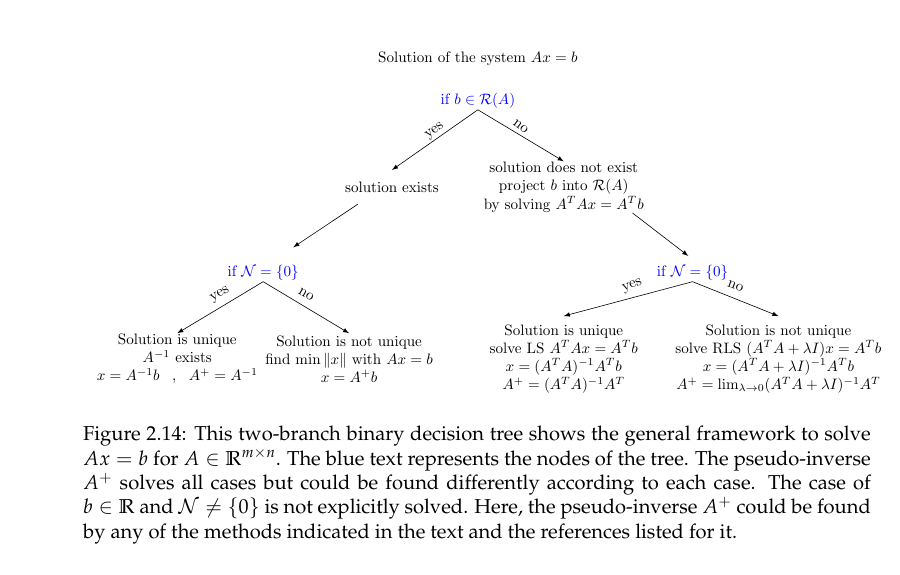

# Machine Larning metodos supervisados.
Que son metodos supervisados. Aca se tiene etiquetas o respuestas al problema. Es decir el problema tiene datos de entrada y de salida y lo de salida (etiquetas) se conocen. Los datos de salida ayudan a resolver el problema. Por ejemplo $Ax = b$, $A$ comprende los datos de entrada, $b$ los de salida (las etiquetas), ML aprende $x$.  Supervisado por $b$ y con datos $A$.

Algunos problemas de machine learning supervisado.

* Autonomous driving (carros que manejan solos. Carros autonomos)
* Por que el WhatsApp puede adivinar la palabra que va a escribir enseguida.
* OCR: Optical Character Regonition. Consideremos solo dos apliciones:
** shapecatcher.com
** Photomath: Aca escribe a mano una ecuacion, le toma una foto y el telefono se la resuelve.

Muchos mas ejemplos.

Los metodos supervisados que vamos a ver son:

* Regresion lineal
* Regresion Logistica
* SVM: Support vector machines
* ANN: Artificial Neural Networks (Redes neuronales artificiales)
* Arboles de decision (no lo vemos)
* Random Forest (arboles aleatorios) (tampoco los memos)
* HDSCAN...tampoco
